In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv
/kaggle/input/model-train-final/model_train_final.csv
/kaggle/input/model-train-final-withencoding/model_train_final_withencoding2.csv


In [3]:
train=pd.read_csv("/kaggle/input/model-train-final-withencoding/model_train_final_withencoding2.csv")
score=pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv")
print(train.columns.tolist())
train

['id', 'count_of_events', 'mean_down_time', 'mean_up_time', 'mean_action_time', 'median_down_time', 'median_up_time', 'median_action_time', 'count_word_count', 'mean_word_count', 'median_word_count', 'idle_word_count', 'count_cursor_position', 'mean_cursor_position', 'median_cursor_position', 'idle_cursor_position', 'common_activity', 'common_up_event', 'common_down_event', 'count_input', 'count_remove', 'count_nonproduction', 'count_replace', 'count_paste', 'input_back_ratio', 'count_down_q', 'count_down_Space', 'count_down_Backspace', 'count_down_Shift', 'count_down_ArrowRight', 'count_down_Leftclick', 'count_down_ArrowLeft', 'count_down_.', 'count_down_,', 'count_down_ArrowDown', 'count_up_q', 'count_up_Space', 'count_up_Backspace', 'count_up_Shift', 'count_up_ArrowRight', 'count_up_Leftclick', 'count_up_ArrowLeft', 'count_up_.', 'count_up_,', 'count_up_ArrowDown']


,id,count_of_events,mean_down_time,mean_up_time,mean_action_time,median_down_time,median_up_time,median_action_time,count_word_count,mean_word_count,...,count_up_q,count_up_Space,count_up_Backspace,count_up_Shift,count_up_ArrowRight,count_up_Leftclick,count_up_ArrowLeft,count_up_.,"count_up_,",count_up_ArrowDown
0,001519c8,2557,8.481808e+05,8.482970e+05,116.246774,891716.0,891802.0,112.0,256,128.116152,...,1619,357,417,27,2,92,2,21,12,0
1,0022f953,2454,5.188553e+05,5.189676e+05,112.221271,407673.0,407789.0,115.0,323,182.714751,...,1490,391,260,97,46,56,49,15,21,3
2,0042269b,4136,8.284918e+05,8.285936e+05,101.837766,759582.0,759674.5,94.0,404,194.772727,...,2899,552,439,39,6,129,0,21,23,0
3,0059420b,1556,7.854830e+05,7.856049e+05,121.848329,848240.5,848405.5,110.0,206,103.618895,...,1038,243,152,68,0,18,0,13,3,0
4,0075873a,2531,7.133542e+05,7.134781e+05,123.943896,686588.0,686728.0,129.0,252,125.082971,...,1541,324,517,39,0,33,0,23,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,4739,7.361019e+05,7.362073e+05,105.437856,735095.0,735219.0,113.0,461,256.353661,...,2844,651,960,164,0,24,0,43,32,0
2467,ffbef7e5,2604,8.419662e+05,8.420485e+05,82.266129,748404.5,748482.0,80.0,438,223.013057,...,1874,447,60,106,0,36,0,31,24,0
2468,ffccd6fd,3063,1.229015e+06,1.229091e+06,75.605615,1506525.0,1507024.0,70.0,201,157.589292,...,969,1861,88,0,29,9,53,5,2,29
2469,ffec5b38,3242,5.765185e+05,5.766078e+05,89.277915,573912.0,574047.0,85.0,413,205.917027,...,2361,457,276,52,0,14,0,31,27,0


In [4]:
train_scaled = train.loc[:, ~train.columns.isin(['id', 'common_activity', 'common_up_event', 'common_down_event', 'input_back_ratio'])]
train_scaled_t = pd.DataFrame(StandardScaler().fit_transform(train_scaled), columns=train_scaled.columns)
train_scaled_t

,count_of_events,mean_down_time,mean_up_time,mean_action_time,median_down_time,median_up_time,median_action_time,count_word_count,mean_word_count,median_word_count,...,count_up_q,count_up_Space,count_up_Backspace,count_up_Shift,count_up_ArrowRight,count_up_Leftclick,count_up_ArrowLeft,count_up_.,"count_up_,",count_up_ArrowDown
0,-0.535194,0.271578,0.271636,0.675947,0.465224,0.465185,0.597083,-0.776975,-0.813732,-0.766337,...,-0.570351,-0.546956,0.079897,-0.403976,-0.196448,1.218496,-0.234815,-0.285097,-0.454546,-0.130185
1,-0.600445,-0.886269,-0.886231,0.508968,-1.080620,-1.080573,0.714992,-0.388390,-0.184298,-0.165412,...,-0.703616,-0.405557,-0.387487,-0.142768,-0.012948,0.422698,0.233151,-0.834395,0.134742,-0.098927
2,0.465103,0.202355,0.202362,0.078257,0.043240,0.043219,-0.110369,0.081392,-0.045290,-0.087515,...,0.751962,0.264008,0.145391,-0.359197,-0.179766,2.036400,-0.254728,-0.285097,0.265695,-0.130185
3,-1.169328,0.051144,0.051221,0.908302,0.326380,0.326593,0.518477,-1.066964,-1.096145,-1.027850,...,-1.170558,-1.021057,-0.708999,-0.250983,-0.204789,-0.417312,-0.254728,-1.017494,-1.043835,-0.130185
4,-0.551665,-0.202448,-0.202364,0.995227,-0.189875,-0.189745,1.265232,-0.800174,-0.848699,-0.977773,...,-0.650930,-0.684196,0.377594,-0.359197,-0.204789,-0.085729,-0.254728,-0.101998,0.331172,-0.130185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.847104,-0.122471,-0.122452,0.227590,-0.034962,-0.034883,0.636386,0.411979,0.664639,1.069821,...,0.695144,0.675728,1.696392,0.107245,-0.204789,-0.284679,-0.254728,1.728995,0.854984,-0.130185
2467,-0.505420,0.249728,0.249668,-0.733582,0.007543,0.007474,-0.660610,0.278584,0.280276,0.296409,...,-0.306922,-0.172665,-0.982881,-0.109184,-0.204789,-0.019413,-0.254728,0.630399,0.331172,-0.130185
2468,-0.214643,1.610520,1.610443,-1.009862,2.428684,2.429975,-1.053639,-1.095963,-0.473954,0.001511,...,-1.241839,5.707862,-0.899525,-0.504728,-0.083846,-0.616262,0.272978,-1.749891,-1.109311,0.171976
2469,-0.101246,-0.683536,-0.683577,-0.442730,-0.549718,-0.549606,-0.464096,0.133590,0.083186,0.046024,...,0.196177,-0.131077,-0.339855,-0.310687,-0.204789,-0.505734,-0.254728,0.630399,0.527601,-0.130185


In [5]:
pca=PCA(n_components=2)
pca_features = pca.fit_transform(train_scaled_t)
pca_features

array([[-2.31028444,  0.29951537],
       [-2.07237774, -0.88258   ],
       [ 0.36418194, -0.03043598],
       ...,
       [ 0.46488501,  1.97558364],
       [ 0.37984435, -1.38888127],
       [-1.86278404,  4.1514272 ]])

[[0.2475159  0.04274336 0.04274088 0.0320392  0.03932129 0.03931941
  0.0249357  0.24204922 0.24318179 0.23946643 0.1412214  0.24564379
  0.24023409 0.23363303 0.12376278 0.25704648 0.15502885 0.06247017
  0.0510426  0.01184568 0.25436263 0.22307958 0.15295229 0.06291408
  0.02924476 0.01860923 0.02360267 0.2002747  0.20292406 0.02107293
  0.25436711 0.22307958 0.15295229 0.06291408 0.02924476 0.01860923
  0.02360267 0.2002747  0.20292406 0.02107293]
 [0.09755456 0.24438442 0.24437493 0.12765495 0.24944873 0.24943967
  0.14362833 0.08091538 0.05346246 0.0330375  0.04306624 0.07433832
  0.07739501 0.07823443 0.08709949 0.03782803 0.07445983 0.34606344
  0.06014551 0.01524268 0.03695877 0.03383266 0.07127018 0.08834169
  0.33248635 0.00903249 0.33299359 0.03712281 0.03358902 0.1770325
  0.03697975 0.03383266 0.07127018 0.08834169 0.33248635 0.00903249
  0.33299359 0.03712281 0.03358902 0.1770325 ]]


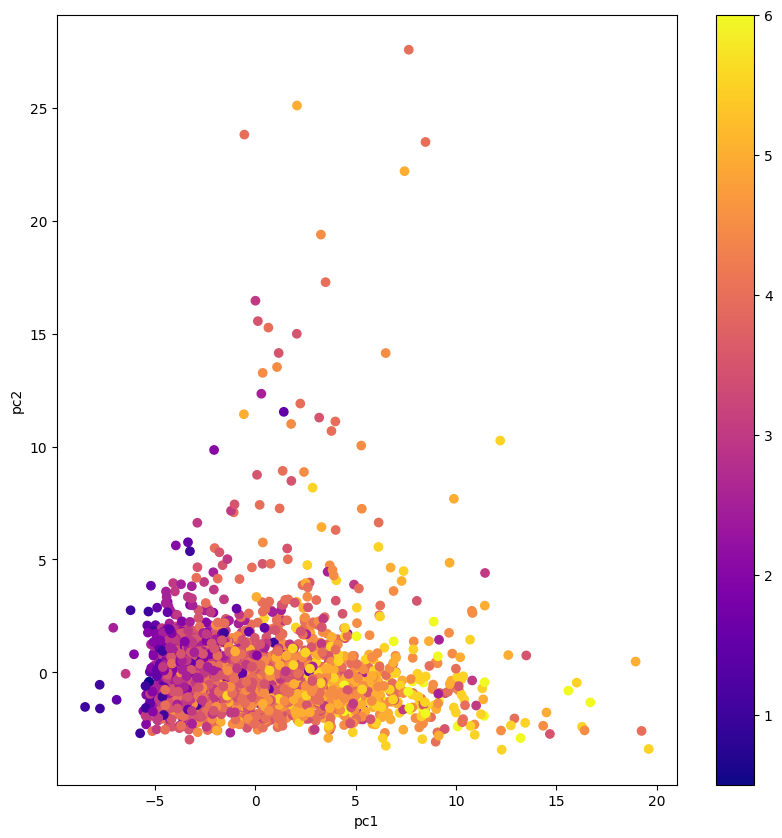

In [6]:
print(abs(pca.components_))
plt.figure(figsize=(10,10))
plt.scatter(pca_features[:,0],pca_features[:,1],c=score['score'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar()

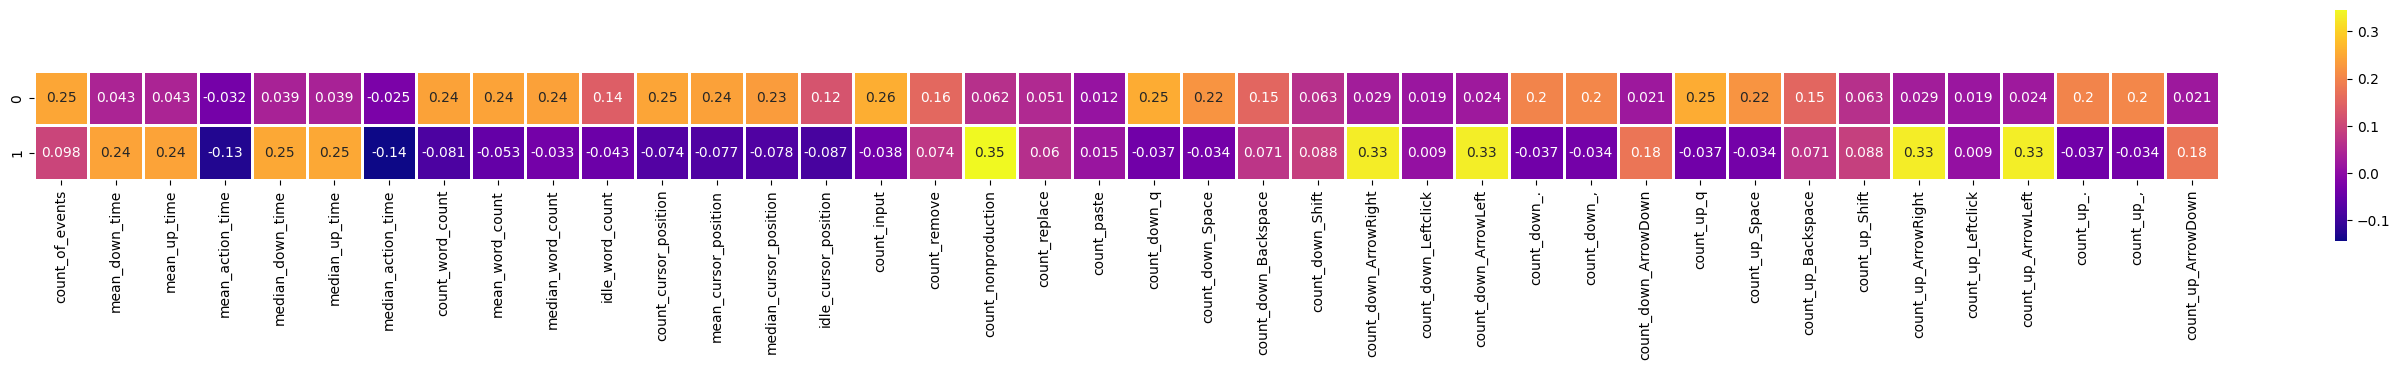

In [7]:
heatmap = pd.DataFrame(pca.components_, columns=train_scaled.columns)
plt.figure(figsize=(30,3))
ax = sns.heatmap(heatmap, annot=True, square=True, cmap='plasma', linewidth=1, cbar_kws={'fraction' : 0.01})
plt.savefig('2d.png')

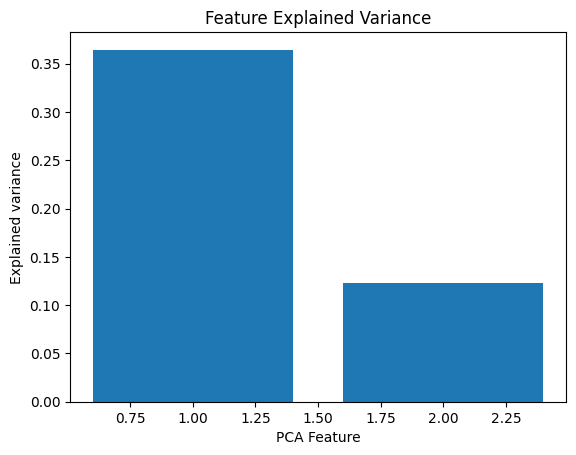

In [8]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [9]:
pca=PCA(n_components=3)
pca_features_3d = pca.fit_transform(train_scaled_t)
pca_features_3d

array([[-2.31028444,  0.29951601,  1.34249174],
       [-2.07237774, -0.88258068, -1.66345714],
       [ 0.36418194, -0.03043479,  0.84863452],
       ...,
       [ 0.46488501,  1.97559147,  3.15329562],
       [ 0.37984435, -1.38888235, -0.81920737],
       [-1.86278404,  4.15142881,  0.73283931]])

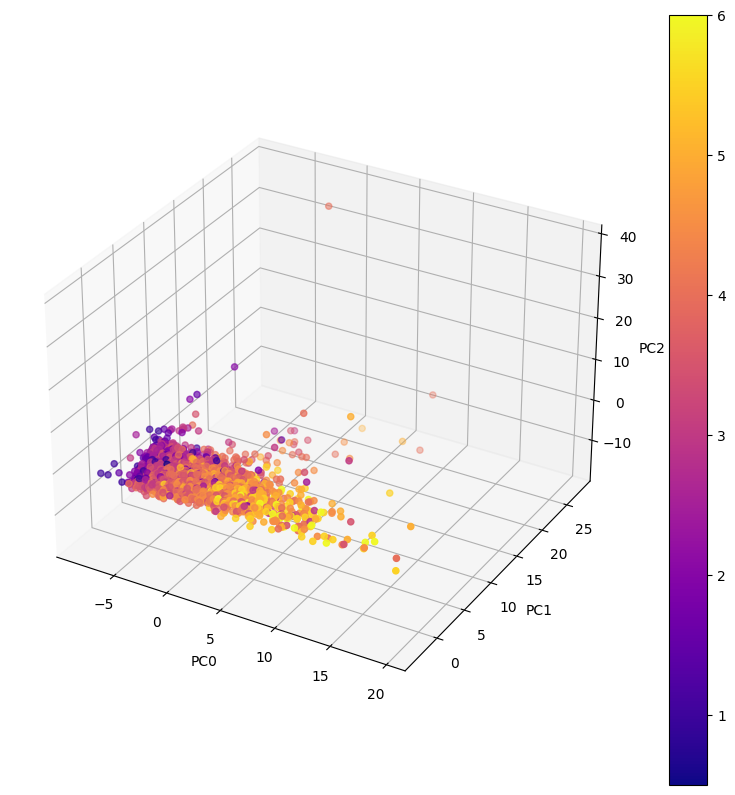

In [10]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
p = axis.scatter(pca_features_3d[:,0],pca_features_3d[:,1], pca_features_3d[:,2], c=score['score'],cmap='plasma')
axis.set_xlabel("PC0", fontsize=10)
axis.set_ylabel("PC1", fontsize=10)
axis.set_zlabel("PC2", fontsize=10)
fig.colorbar(p)

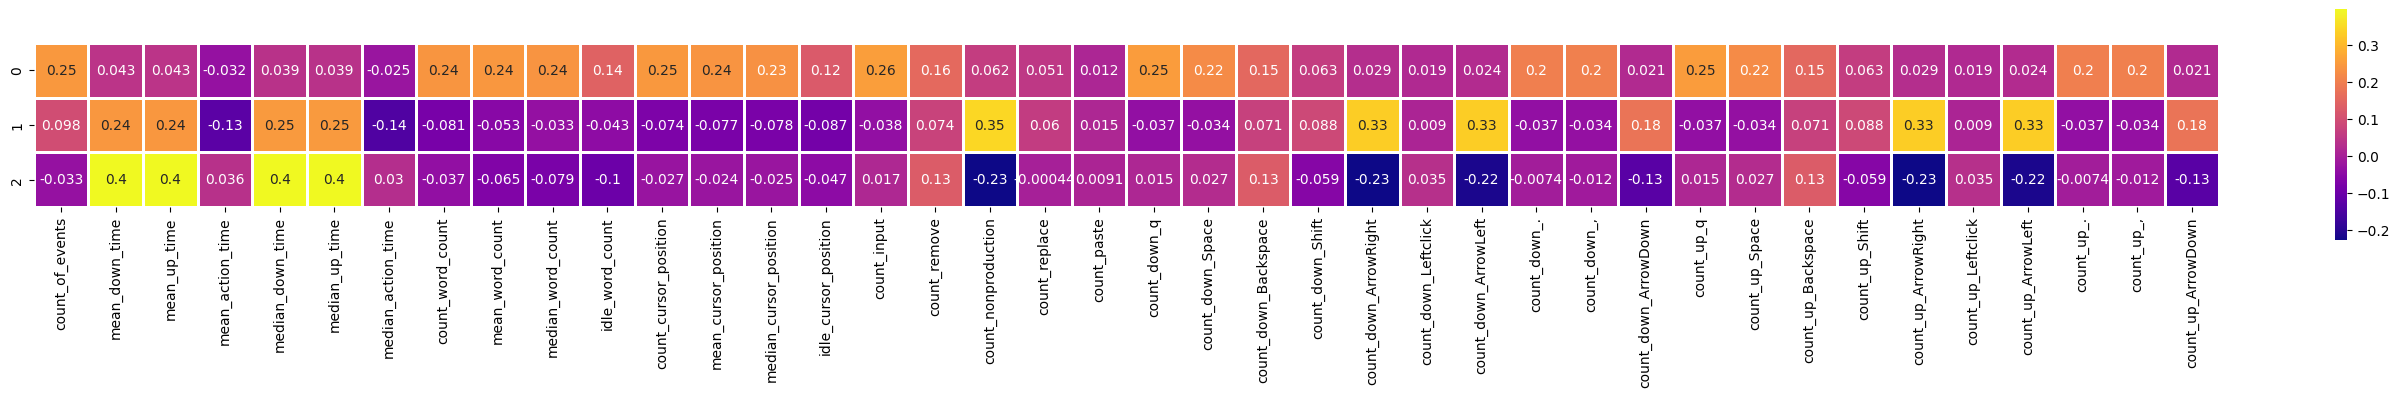

In [11]:
heatmap = pd.DataFrame(pca.components_, columns=train_scaled.columns)
plt.figure(figsize=(30,3))
ax = sns.heatmap(heatmap, annot=True, square=True, cmap='plasma', linewidth=1, cbar_kws={'fraction' : 0.01})
plt.savefig('3d.png')

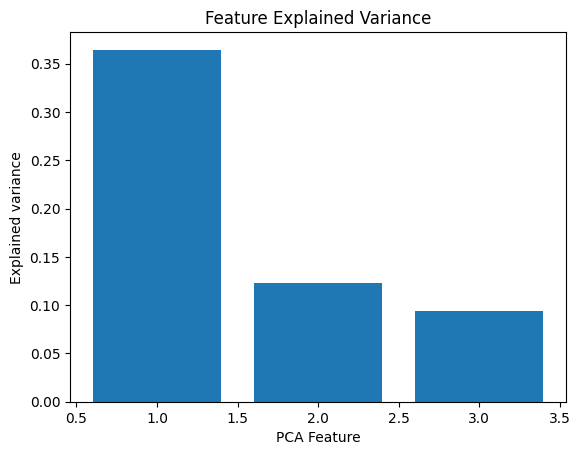

In [12]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [60]:
# Decision Tree Classifier
# enc = preprocessing.LabelEncoder()
y = score['score']
X = train_scaled_t

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=20)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
#accuracy = accuracy_score(predicted, y_test)
mae = mean_absolute_error(predicted, y_test)
mse = mean_squared_error(predicted, y_test)
rmse = mean_squared_error(predicted, y_test, squared=False)
#print(f'Accuracy: {accuracy}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

(2223, 40) (248, 40) (2223,) (248,)
MAE: 0.46856391616759224
MSE: 0.3615874588887331
RMSE: 0.6013214272655957


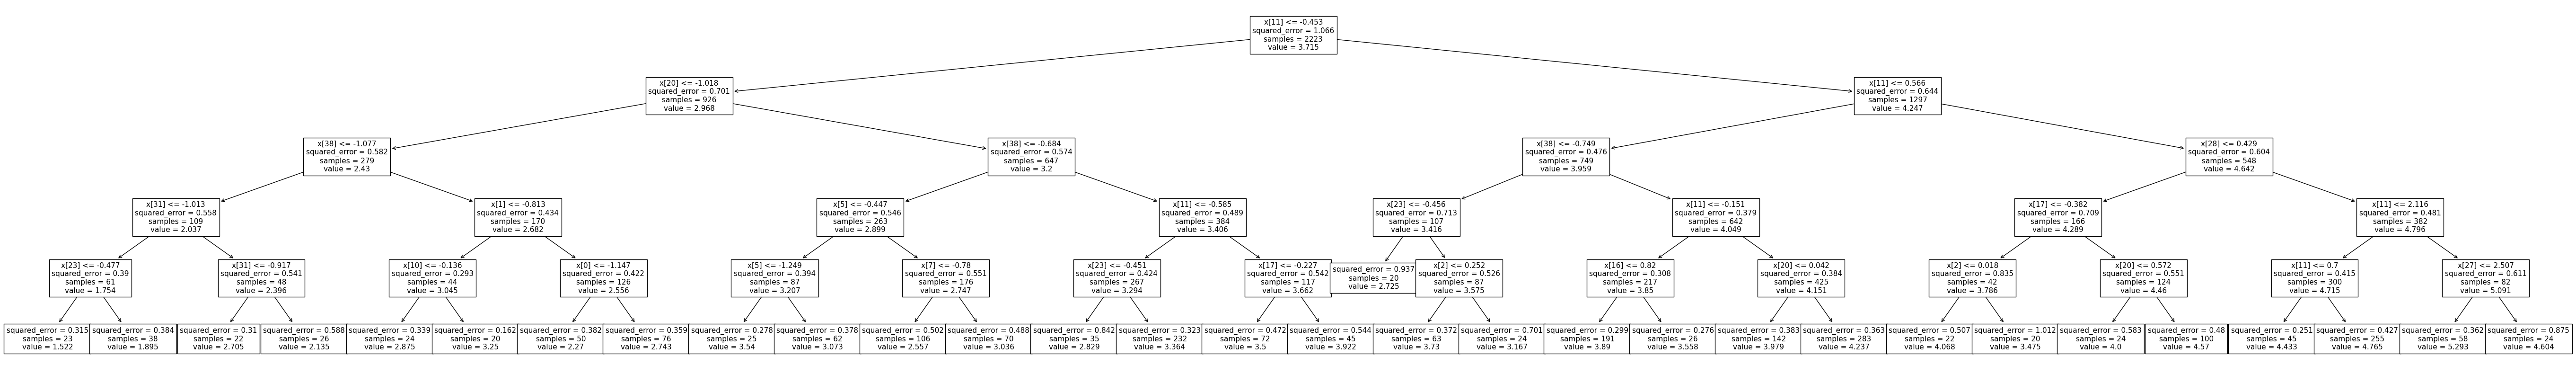

In [49]:
plt.figure(figsize=(70,10))  
tree.plot_tree(model, fontsize=11)
plt.savefig('tree.eps',format='eps', dpi=300)